In [1]:
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np

data = pd.read_csv('OJ.csv',header='infer')
data.head(100)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CH,277,2,1.99,2.18,0.00,0.0,0,0,0.600000,2.18,1.99,0.19,No,0.000000,0.000000,0.19,2
96,CH,277,7,1.99,2.13,0.50,0.0,0,1,0.400000,2.13,1.49,0.64,Yes,0.000000,0.251256,0.14,0
97,CH,227,2,1.69,1.69,0.00,0.0,0,0,0.744000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,2
98,CH,229,2,1.69,1.69,0.00,0.0,0,0,0.795200,1.69,1.69,0.00,No,0.000000,0.000000,0.00,2


In [2]:
data.dtypes

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [3]:
data['Store7'] = data['Store7'].apply(lambda x: True if x == 'Yes' else False)
data
data['Store7']=data['Store7'].astype(int)
data.dtypes

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7              int32
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [4]:
#1
Y = data['Purchase'] #this is our prediction target
X = data.drop(['Purchase'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2022) 

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_train)
training_error_rate = 1 - accuracy_score(Y_train, Y_pred)
# Number of terminal nodes can be obtained using tree.tree_.node_count attribute
num_terminal_nodes = tree.tree_.node_count
#2
print(training_error_rate)
print(num_terminal_nodes)

0.010514018691588745
379


In [6]:
#3
import graphviz
dot_data = export_graphviz(tree,out_file=None,feature_names = X_train.columns,
                            class_names = tree.classes_,filled=True,rounded = True,
                            leaves_parallel=True,proportion=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("OJ_desision_tree1",view=True)

#interpet the tree graph...
#first split variables are LoyalCH, gini, samples, value and class.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.928217 to fit


'OJ_desision_tree1.png'

0.23831775700934577


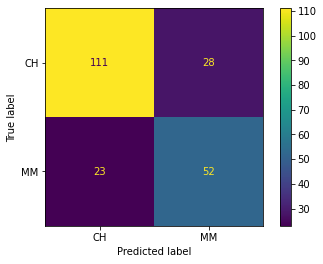

In [7]:
#4
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
Y_predTest = tree.predict(X_test)
test_error_rate = 1 - accuracy_score(Y_test, Y_predTest)
print(test_error_rate)
cm = confusion_matrix(Y_test, Y_predTest, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree.classes_)
disp.plot()
plt.show()

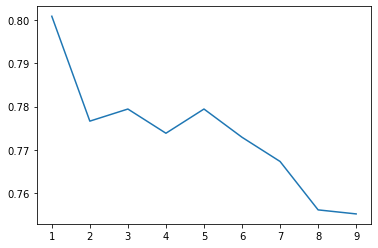

In [8]:
#5
from sklearn.model_selection import cross_val_score
x_point = []
y_point = []
for i in range(1,10):
    max_depth = i
    x_point.append(i)
    tree = DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(tree, X, Y, cv=5)
    y_point.append(scores.mean())
plt.plot(x_point,y_point)
#max_depths = 1是最好的,再增大会导致过拟合

0.2009345794392523


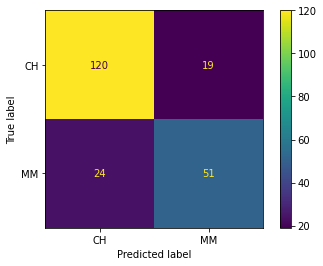

In [9]:
#6
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(X_train, Y_train)
Y_predTest = tree.predict(X_test)
test_error_rate = 1 - accuracy_score(Y_test, Y_predTest)
print(test_error_rate)
cm = confusion_matrix(Y_test, Y_predTest, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree.classes_)
disp.plot()
plt.show()
#this one is better

In [10]:
dot_data = export_graphviz(tree,out_file=None,feature_names = X_train.columns,
                            class_names = tree.classes_,filled=True,rounded = True,
                            leaves_parallel=True,proportion=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("OJ_desision_tree2",view=True)

'OJ_desision_tree2.png'

In [11]:
#7
importance = tree.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importance)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))
    print(feature_names[indices[f]])

1. feature 8 (1.000000)
LoyalCH
2. feature 7 (0.000000)
SpecialMM
3. feature 1 (0.000000)
StoreID
4. feature 2 (0.000000)
PriceCH
5. feature 3 (0.000000)
PriceMM
6. feature 4 (0.000000)
DiscCH
7. feature 5 (0.000000)
DiscMM
8. feature 6 (0.000000)
SpecialCH
9. feature 16 (0.000000)
STORE
10. feature 15 (0.000000)
ListPriceDiff
11. feature 9 (0.000000)
SalePriceMM
12. feature 10 (0.000000)
SalePriceCH
13. feature 11 (0.000000)
PriceDiff
14. feature 12 (0.000000)
Store7
15. feature 13 (0.000000)
PctDiscMM
16. feature 14 (0.000000)
PctDiscCH
17. feature 0 (0.000000)
WeekofPurchase
